author : sybyeon102@gmail.com

## import

In [2]:
import pandas as pd
import numpy as np

In [3]:
from scipy import stats

In [4]:
import matplotlib.pyplot as plt

# 연습용 데이터 생성

## dataA 병무청 - 안과
- 사용할 컬럼 정보 (count 230만개)
    - 검사년도int64 : 2014-2020 
    - 생년월일int64 : 25 199607, 75 200001
    - 검사반str : 15군데지역, 서울은 1,2검사장
    - 신장float64 : 25 169.9, 75 177.4
    - 체중float64 : 25 60.40, 75 77.90, 
    - 시력좌float64 : 14만개가 0.00/ 25 0.1, 75 1.0
    - 시력우float64 :16만개가 0.00/ 25 0.1, 75 1.0
    - 학력str : 중학교이하, 고등학교, 전문학사, 학사, 석사, 박사
    - BMI float64 : 10.8-77.40, 25 20.2, 75 25.5

- 검사년도 17-20년 (총 4년) 년도별 30만개

In [4]:
# 타입설정 dtype=np.int64
type(np.random.randint(2014, 2021, 100, dtype=np.int64)[0])

numpy.int64

In [9]:
n_row = int(1e6)*3*4

### calyear

In [6]:
calyear = np.random.randint(2017, 2020+1, n_row, dtype=np.int64)

In [7]:
calyear

array([2019, 2019, 2019, ..., 2018, 2020, 2017], dtype=int64)

### byear

In [8]:
y_added = [0, 1, 2, 3, 4, 5]

In [9]:
probs = np.array([30, 15, 7, 4, 2, 0.5])
probs = probs/np.sum(probs)
probs

array([0.51282051, 0.25641026, 0.11965812, 0.06837607, 0.03418803,
       0.00854701])

In [10]:
byear = calyear - 19 - np.random.choice(y_added, size=n_row, p=probs)

In [11]:
byear

array([2000, 2000, 2000, ..., 1999, 2000, 1996], dtype=int64)

### calregion

In [12]:
regions = [f'{i+1}번검사반' for i in range(15)]

In [13]:
calregion = np.random.choice(regions, size=n_row)

### height
신장float64 : 25 169.9, 75 177.4

In [14]:
mean = (169.9 + 177.4)/2
std = 6 # 25%, 75% 값이 169, 177가까이 나오는 값

In [15]:
rv = stats.norm(mean, std)

In [16]:
height = rv.rvs(n_row)

In [17]:
height = height.round(2)

### BMI
BMI float64 : 10.8-77.40, 25 20.2, 75 25.5

In [18]:
mean = (20.2 + 25.5)/2
std = 3.4
rv = stats.norm(mean, std)
rv.interval(0.5)

(20.556734849333324, 25.14326515066668)

In [19]:
BMI = rv.rvs(n_row)
BMI = BMI.round(1)
BMI

array([20. , 18.8, 21.3, ..., 22.2, 24.3, 15.7])

### weight
체중float64 : 25 60.40, 75 77.90

In [20]:
weight = BMI*(height/100)**2

In [21]:
weight = weight.round(2)
weight

array([57.85, 55.92, 67.37, ..., 76.22, 70.05, 46.21])

### vision_l
시력좌float64 : 14만개(6%)가 0.00/ 25 0.1, 75 1.0

In [22]:
vl_pmf = pd.read_pickle('./data/vision_left_pmf.pkl')
vl_pmf

0.0    0.067358
0.1    0.207254
0.2    0.051813
0.3    0.051813
0.4    0.051813
0.5    0.051813
0.6    0.051813
0.7    0.051813
0.8    0.051813
0.9    0.051813
1.0    0.310881
Name: vision_left_pmf, dtype: float64

In [23]:
vision_l = np.random.choice(vl_pmf.index, size=n_row, p=vl_pmf.values)
vision_l

array([1. , 0.1, 0.1, ..., 0.4, 1. , 0.1])

### vision_r
시력float64 : 16만개(7%)가 0.00 25 0.1, 75 1.0

In [24]:
vision_r = vision_l.copy()

### education
- 학력str : 중학교이하, 고등학교, 전문학사, 학사, 석사, 박사

In [25]:
e_class = '중학교이하, 고등학교, 전문학사, 학사, 석사, 박사'.split(', ')
e_class

['중학교이하', '고등학교', '전문학사', '학사', '석사', '박사']

In [26]:
e_freq = [1, 10, 20, 50, 3, 1]
e_freq = np.array(e_freq)/sum(e_freq)
e_freq

array([0.01176471, 0.11764706, 0.23529412, 0.58823529, 0.03529412,
       0.01176471])

In [27]:
education = np.random.choice(e_class, size=n_row, p=e_freq)
education

array(['고등학교', '학사', '전문학사', ..., '석사', '석사', '학사'], dtype='<U5')

### 합치기 data1

In [28]:
data = dict(zip('calyear, byear, calregion, height, weight, BMI, vision_l, vision_r, education'.split(', '),
                [calyear, byear, calregion, height, weight, BMI, vision_l, vision_r, education]))

In [29]:
data1 = pd.DataFrame(data=data)
data1.info()
data1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000000 entries, 0 to 11999999
Data columns (total 9 columns):
 #   Column     Dtype  
---  ------     -----  
 0   calyear    int64  
 1   byear      int64  
 2   calregion  object 
 3   height     float64
 4   weight     float64
 5   BMI        float64
 6   vision_l   float64
 7   vision_r   float64
 8   education  object 
dtypes: float64(5), int64(2), object(2)
memory usage: 824.0+ MB


,calyear,byear,calregion,height,weight,BMI,vision_l,vision_r,education
0,2019,2000,7번검사반,170.08,57.85,20.0,1.0,1.0,고등학교
1,2019,2000,15번검사반,172.47,55.92,18.8,0.1,0.1,학사
2,2019,2000,14번검사반,177.84,67.37,21.3,0.1,0.1,전문학사
3,2019,1999,11번검사반,176.71,53.71,17.2,0.1,0.1,학사
4,2020,2001,15번검사반,179.67,74.89,23.2,0.4,0.4,전문학사


In [30]:
pd.read_pickle('./data/mpe_vision.pkl')

,calyear,byear,calregion,height,weight,BMI,vision_l,vision_r,education
0,2019,2000,6번검사반,174.07,73.33,24.2,1.0,1.0,학사
1,2019,1999,12번검사반,163.14,64.94,24.4,0.3,0.3,전문학사
2,2020,2000,9번검사반,178.33,57.88,18.2,0.0,0.0,학사
3,2017,1998,2번검사반,180.22,62.04,19.1,0.1,0.1,전문학사
4,2019,2000,15번검사반,165.65,69.15,25.2,0.7,0.7,전문학사
...,...,...,...,...,...,...,...,...,...
11999995,2019,2000,1번검사반,174.75,58.02,19.0,1.0,1.0,학사
11999996,2017,1997,2번검사반,173.98,102.01,33.7,1.0,1.0,고등학교
11999997,2020,2001,3번검사반,169.47,72.95,25.4,0.6,0.6,학사
11999998,2018,1997,13번검사반,177.55,60.84,19.3,0.8,0.8,학사


## dataB 병무청 - 방사선/잠복결핵데이터
- 사용할 컬럼 정보 (count 146만개)
    - (공통)검사일자int64 : 20170112-20211230 
    - (공통)생년int64 : 1980-2003
    - (공통)검사반str : 15군데지역, 서울은 1,2검사장
    - (공통)신장float64 : 109.2-215.0, 평균 173.7
    - (공통)체중float64 : 23.9-224.1
    - 수축기혈압float64 : 100-233
    - 이완기혈압float64 : 25 69, 75 81
    - AST float64 : 25 15, 75 23
    - ALT float64 : 25 12, 75 27
    - r_GTP float64 : 25 15, 75 29
    - CHOLESTEROL float64 : 25 145, 75 183
    - CREATININE : 25 82, 75 98
    - GLUCOSE : 25 93, 75 104

### SBP
- 25/50/75 : 100/110/120

In [5]:
s_mean = 110
s_std = 15
rv = stats.norm(s_mean, s_std)
rv.isf(0.75), rv.isf(0.25)

(99.88265374705878, 120.11734625294122)

In [10]:
n_row

12000000

In [11]:
SBP = rv.rvs(size=n_row)
SBP = SBP.round()
SBP[:50]

array([23., 26., 16., 20., 22.,  8., 21., 12., 15., 12., 15., 17., 16.,
       19., 17., 14., 20., 23., 24., 14., 17., 12., 29., 21., 17., 17.,
       10., 30., 14., 25., 16.,  7., 19., 28., 15., 26., 20., 20., 14.,
       18., 21., 17., 21., 26., 17., 19., 16.,  5., 17., 13.])

### DBP
- 25/50/75 : 69/76/81

In [12]:
z = (SBP - s_mean)/s_std

In [13]:
d_mean = 76
d_std = 9
rv = stats.norm(d_mean, d_std)
rv.isf(0.75), rv.isf(0.25)

(69.92959224823527, 82.07040775176473)

In [14]:
DBP = z*d_std + d_mean
DBP = DBP.round()
DBP

array([24., 26., 20., ..., 20., 24., 25.])

### AST
q1 15 q3 23

In [15]:
ast_mean = 19
ast_std = 5
rv = stats.norm(ast_mean, ast_std)
rv.isf(0.75), rv.isf(0.25)

(15.627551249019591, 22.372448750980407)

In [16]:
AST = rv.rvs(size=n_row)
AST = AST.round()
AST

array([16., 18., 14., ..., 15., 19., 18.])

### ALT
q1-3/ 12-27

In [17]:
z = (AST - ast_mean)/ast_std

In [18]:
alt_mean = 20
alt_std = 11
rv = stats.norm(alt_mean, alt_std)
rv.isf(0.75), rv.isf(0.25)

(12.580612747843102, 27.4193872521569)

In [19]:
ALT = z*alt_std + alt_mean

In [20]:
ALT = ALT.round()
ALT

array([13., 18.,  9., ..., 11., 20., 18.])

### r_GTP
q1-3, 15-29

In [24]:
mean = 22
std = 10
rv = stats.norm(mean, std)
rv.isf(0.75), rv.isf(0.25)

(15.255102498039182, 28.744897501960818)

In [25]:
r_GTP = rv.rvs(size=n_row)
r_GTP = r_GTP.round()
r_GTP

array([33., 34., 40., ..., 26., 17., 34.])

### CHOLESTEROL
q1-3, 145 - 183

### CREATININE
q1-3, 82-98

### GLUCOSE
q1-3, 93-104

# 기타

## 공공데이터에 병무청 샘플 자료

In [14]:
sample = pd.read_csv('./data/병무청_안과 관련 검사 기초자료[Kdata]_20201231.csv', encoding='euc-kr')

In [15]:
sample.info()
sample.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   검사연도        20 non-null     int64  
 1   생년월         20 non-null     object 
 2   검사반         20 non-null     object 
 3   학력          20 non-null     object 
 4   신장(cm)      20 non-null     float64
 5   체중(kg)      20 non-null     float64
 6   체질량지수(BMI)  20 non-null     float64
 7   시력_좌        20 non-null     float64
 8   시력_우        20 non-null     float64
 9   구면치_좌       13 non-null     float64
 10  구면치_우       13 non-null     float64
 11  원주치_좌       13 non-null     float64
 12  원주치_우       13 non-null     float64
 13  축_좌         13 non-null     float64
 14  축_우         13 non-null     float64
 15  색각여부        20 non-null     object 
dtypes: float64(11), int64(1), object(4)
memory usage: 2.6+ KB


,검사연도,생년월,검사반,학력,신장(cm),체중(kg),체질량지수(BMI),시력_좌,시력_우,구면치_좌,구면치_우,원주치_좌,원주치_우,축_좌,축_우,색각여부
0,2020,2001-07,경남,4년제대학 재학,174.3,84.8,27.9,0.1,0.1,-3.00,-3.75,-2.50,-2.00,170.0,178.0,정상
1,2020,2001-11,광주.전남,4년제대학 재학,178.7,83.8,26.2,0.2,0.2,-6.25,-6.25,-1.75,-1.75,171.0,3.0,정상
2,2020,2001-01,수원,4년제대학 재학,177.0,78.4,25.0,1.2,0.1,0.00,-2.50,0.00,-0.25,180.0,113.0,정상
3,2020,2001-09,서울1검사장,2년제대학 휴학,170.1,67.7,23.3,0.4,0.4,NaN,NaN,NaN,NaN,NaN,NaN,정상
4,2020,2001-03,경기북부,4년제대학 재학,176.6,72.0,23.0,0.6,0.7,NaN,NaN,NaN,NaN,NaN,NaN,정상


## 시력(좌)의   PMF만들기 - vision_left_pmf.pkl

### 국민건강검진정보 참고

In [92]:
ref_vl = pd.read_pickle('./data/vision_value_counts.pkl')
ref_vl

0.1     11220
0.2     13264
0.3     22970
0.4     35371
0.5     62714
0.6     65344
0.7    100542
0.8    113519
0.9    118708
1.0    202138
1.1        64
1.2    159080
1.3        87
1.4        13
1.5     85110
1.6       265
1.7        12
1.8        17
1.9        20
2.0      5555
Name: 시력(좌), dtype: int64

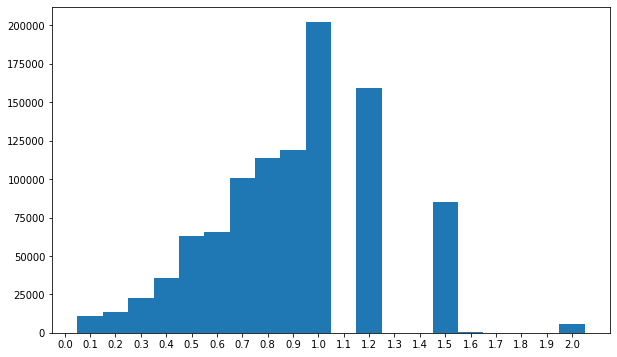

In [93]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

# ax.plot(ref_vl)
ax.bar(ref_vl.index, ref_vl, width=0.1)
ax.set_xticks(np.array(range(21))/10)
plt.show()

In [94]:
ref_vl = (ref_vl/10000).round()

In [95]:
v_class = [0.0] + list(ref_vl.index)

In [108]:
v_freq = list(ref_vl.values)
v_freq = [5] + v_freq

In [109]:
li = [1, 2, 3, 4, 5, 7, 11, 17, 25, 30]
sum(li)

105

In [110]:
li = np.array(li[::-1])
li = li/sum(li)*5

In [111]:
v_freq[:11]

[5, 1.0, 1.0, 2.0, 4.0, 6.0, 7.0, 10.0, 11.0, 12.0, 20.0]

In [104]:
v_freq = v_freq[:11] + list(li)
v_freq

[5,
 1.0,
 1.0,
 2.0,
 4.0,
 6.0,
 7.0,
 10.0,
 11.0,
 12.0,
 20.0,
 1.4285714285714284,
 1.1904761904761905,
 0.8095238095238095,
 0.5238095238095238,
 0.3333333333333333,
 0.23809523809523808,
 0.1904761904761905,
 0.14285714285714285,
 0.09523809523809525,
 0.04761904761904762]

In [105]:
v_freq = np.array(v_freq)/sum(v_freq)
v_freq

array([0.05952381, 0.01190476, 0.01190476, 0.02380952, 0.04761905,
       0.07142857, 0.08333333, 0.11904762, 0.13095238, 0.14285714,
       0.23809524, 0.0170068 , 0.01417234, 0.00963719, 0.00623583,
       0.00396825, 0.00283447, 0.00226757, 0.00170068, 0.00113379,
       0.00056689])

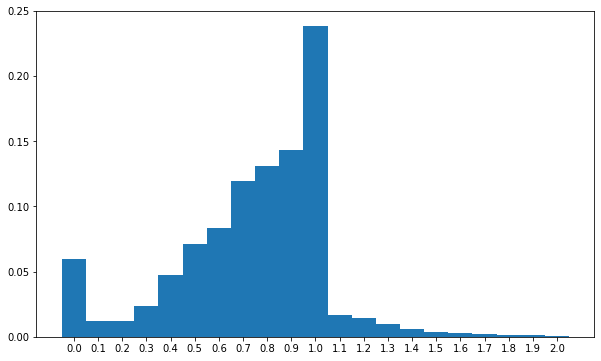

In [107]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

ax.bar(v_class, v_freq, width=0.1)
ax.set_xticks(np.array(range(21))/10)

plt.show()

In [112]:
vision_l = pd.Series(data=v_freq, index=v_class, name='vision_left_pmf')

### 임의

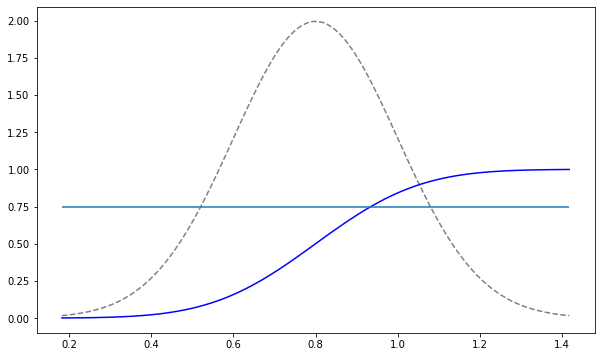

In [119]:
mean = 0.8
std = 0.2
rv = stats.norm(mean, std)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

xs = np.linspace(rv.isf(0.999), rv.isf(0.001), 100)
ax.plot(xs, rv.pdf(xs), color='gray', ls='--')
ax.plot(xs, rv.cdf(xs), color='blue')
ax.hlines(0.75, rv.isf(0.999), rv.isf(0.001))

plt.show()

시력좌float64 : 14만개(6%)가 0.00/ 25 0.1, 75 1.0

In [159]:
v_class = [i/10 for i in range(11)]
v_class

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

In [162]:
v_freq = [1]*11
v_freq[0] += 0.3
v_freq[1] += 3
v_freq[-1] += 5
v_freq = np.array(v_freq)/sum(v_freq)
print(v_freq)

[0.06735751 0.20725389 0.05181347 0.05181347 0.05181347 0.05181347
 0.05181347 0.05181347 0.05181347 0.05181347 0.31088083]


In [163]:
vision_l = pd.Series(data=v_freq, index=v_class, name='vision_left_pmf')

In [165]:
pd.read_pickle('./data/vision_left_pmf.pkl')

0.0    0.067358
0.1    0.207254
0.2    0.051813
0.3    0.051813
0.4    0.051813
0.5    0.051813
0.6    0.051813
0.7    0.051813
0.8    0.051813
0.9    0.051813
1.0    0.310881
Name: vision_left_pmf, dtype: float64